<a href="https://colab.research.google.com/github/ralsouza/machine_learning_python/blob/master/notebooks/02_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining business problem
Let's go create a predictive model that's able to predict whether or not a patient has diabetes. To do this, we'll use historical data from patients.

We'll use the dataset [Diabetes Data Set](http://archive.ics.uci.edu/ml/datasets/diabetes)


This dataset describes the medical records of patients from Pima Indians and each record was marqued whether the patient develop diabetes or not.


**Information about the atributes:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

# 2. Extracting and loading data

In [ ]:
# Import libraries
import pandas as pd

In [ ]:
# Dataset path
path = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

In [ ]:
# Load data
data = pd.read_csv(path)
data.head(5)

# This dataset doesn't have header

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# Load again and add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv(path,names=columns)

In [ ]:
# Check dataset with column names
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking the shape
data.shape

(768, 9)

# 3. Data preprocessing

## 3.1 Exploratory Data Analysis - Descriptive Analysis

In [ ]:
# Predictor variables: preg	,plas	,pres	,skin	,test	,mass	,pedi ,age
# Target variable: class
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


If the number of rows in the file is bigger, the algorithm might take much time to process. Whether the number of records is smallest, it's possible that there isn't no records enough to train the model.

If there are many columns, the algorithm might have performance problems because the high dimensionality.

The best solution will be depend case by case. Remember that: train the model in a subset of the whole dataset and then apply the model with new data.


In [ ]:
# Check shape
data.shape

(768, 9)

The data types are very important, it might be possible to convert strings, or columns with integer numbers could represent categorical variables or ordinary values.

In [ ]:
# Data types of each attribute
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
# Describing data
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1.1 Check the balance of target variable
In classification problems it might be necessary to balance the classes. Unbalance classes (that is: greater volume in one the classes) are common and need to be addressed during the pre processing fase. We can see bellow that exists a clear disproportion between the classes 0 (not occurrence of diabetes) and 1 (occurrence of diabetes).

The algorithm might learn more about the the class 0 than the class 1, it's possible to apply some technique to balance these variables.

In [ ]:
# Check the balance of the target variable - Distribuition of classes
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In classification problems it might be necessary to balance the classes. Unbalance classes (that is: greater volume in one the classes) are common and need to be addressed during the pre processing fase. We can see above that exists a clear disproportion between the classes 0 (not occurrence of diabetes) and 1 (occurrence of diabetes).

The algorithm might learn more about the the class 0 than the class 1, it's possible to apply some technique to balance these variables.

### 3.1.2 Check the correlation between variables
The correlation is the relationship between two variables. The most common method to calculate correlation is the **Pearson correlation**, that assumes a normal distribuition of data. A correlation -1 show a negative correlation, while a correlation +1 shows a positive correlation. A correlation iguals 0 means that there is no correlation between variables.

Some algorithms such as linear regression and logistic regression may present performance problems if there are highly correlated attributes (collinearity).

In [ ]:
# Pearson correlation method
data.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 3.1.3 Skewness - A measure of the asymmetry
Skewness (of asymmetry) refers to the distribuition of data that is assumed to be normal or gaussian (bell curve). Many algorithms of machine learning assumes that the data is in a normal distribuition. Knowing the symmetry, it allows to do some preparation and deliver what the algorithm expects to receive, increasing the accuracy of the predict model.

In [ ]:
# Check the skewness
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## 3.2. Data Visualization - Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### 3.2.1 Histogram
We can see that the `age`, `order` and `test` have an exponential distribuition and the `mass` and `press` have a normal distribuition.

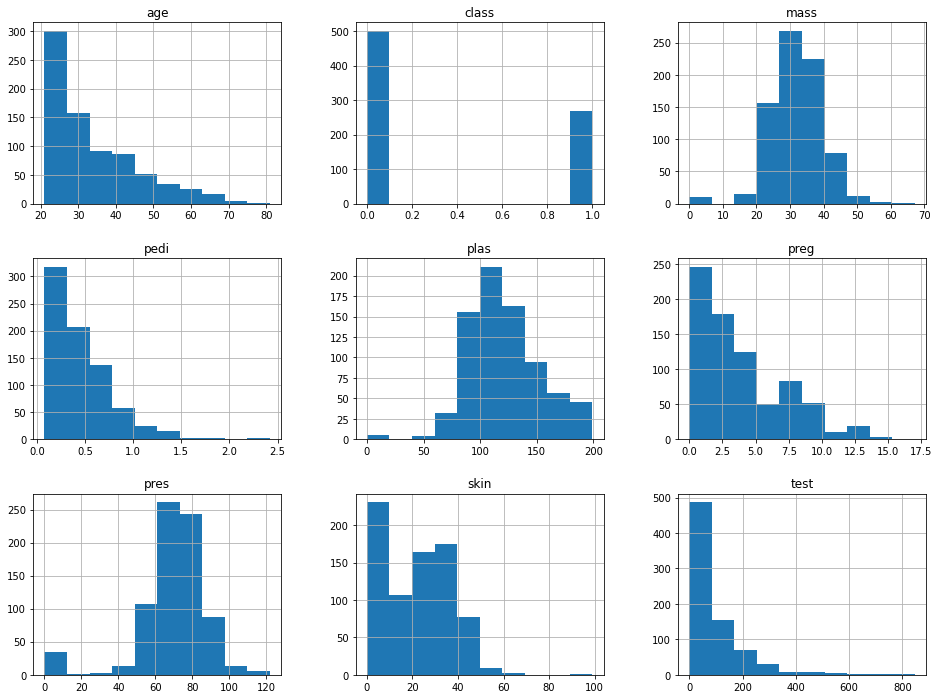

In [ ]:
data.hist(figsize=(16,12))
plt.show()

### 3.2.2 Density Plot

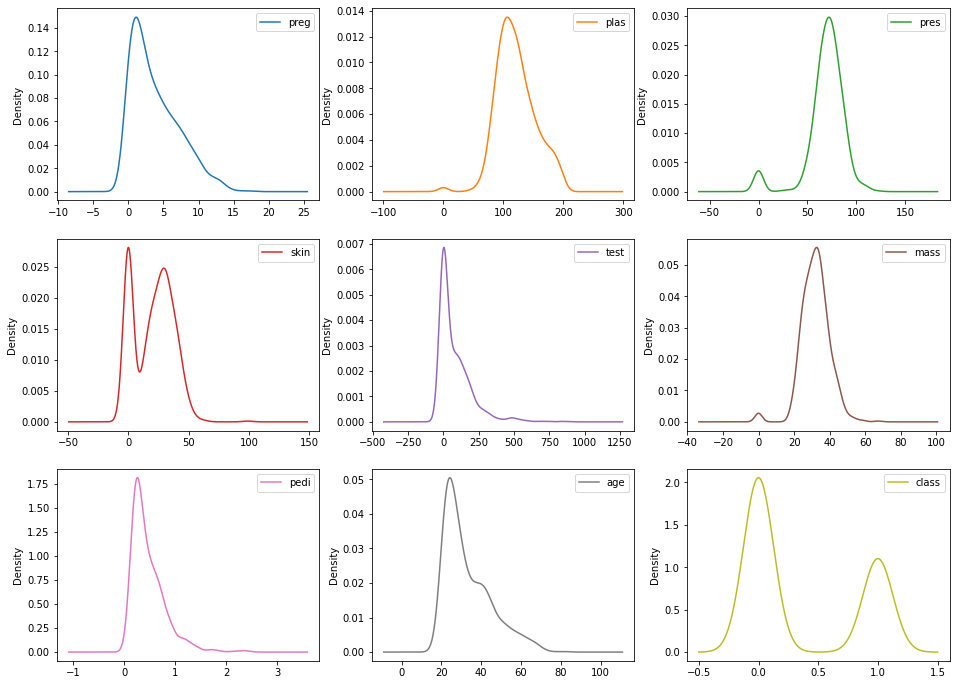

In [ ]:
data.plot(kind='density',figsize=(16,12),subplots=True,layout=(3,3),sharex=False)
plt.show()

### 3.2.3 Boxplot
Very useful to identify outliers and data dispersion.
  We can see that the dispersion of the data is quite different among the attributes. The columns `age`, `skin` and `test` have a symmetry closer to the values of the smallest data.


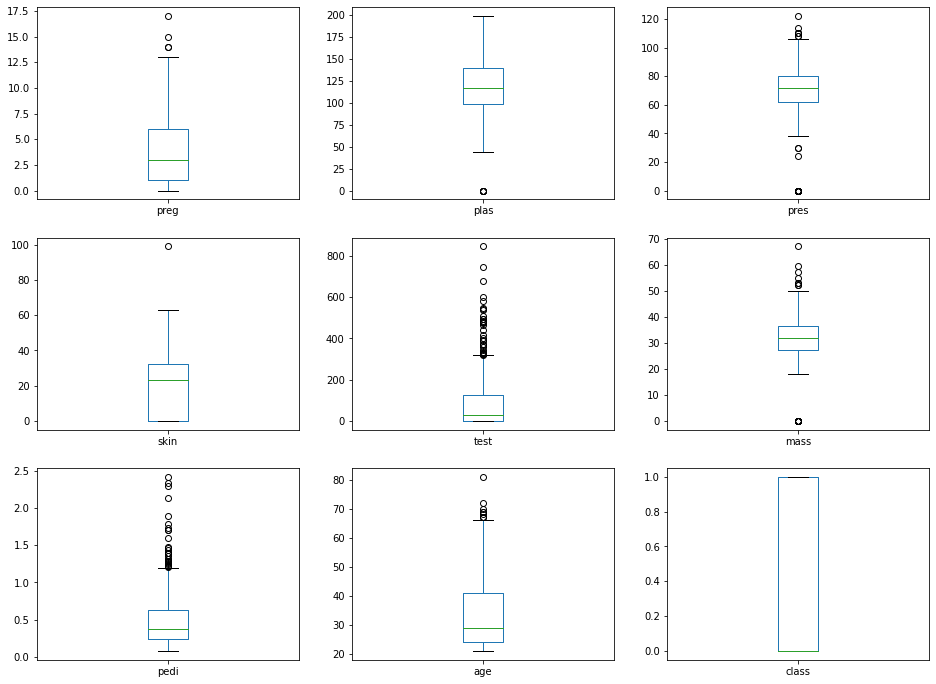

In [ ]:
data.plot(kind='box',figsize=(16,12),subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

### 3.2.4 Correlation Matrix

In [ ]:
import numpy as np

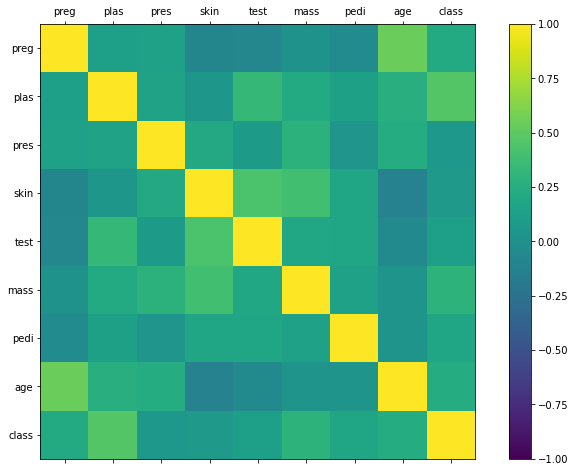

In [ ]:
correlations = data.corr()

# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

### 3.2.5 Scatterplot
A scatterplot shows the relationship between two variables with points in two dimensions, being an axis to each variable.

Is possible to create a scatterplot to each pair of variables in a dataset. The scatterplot matrix is symmetryc.

In [ ]:
from pandas.plotting import scatter_matrix

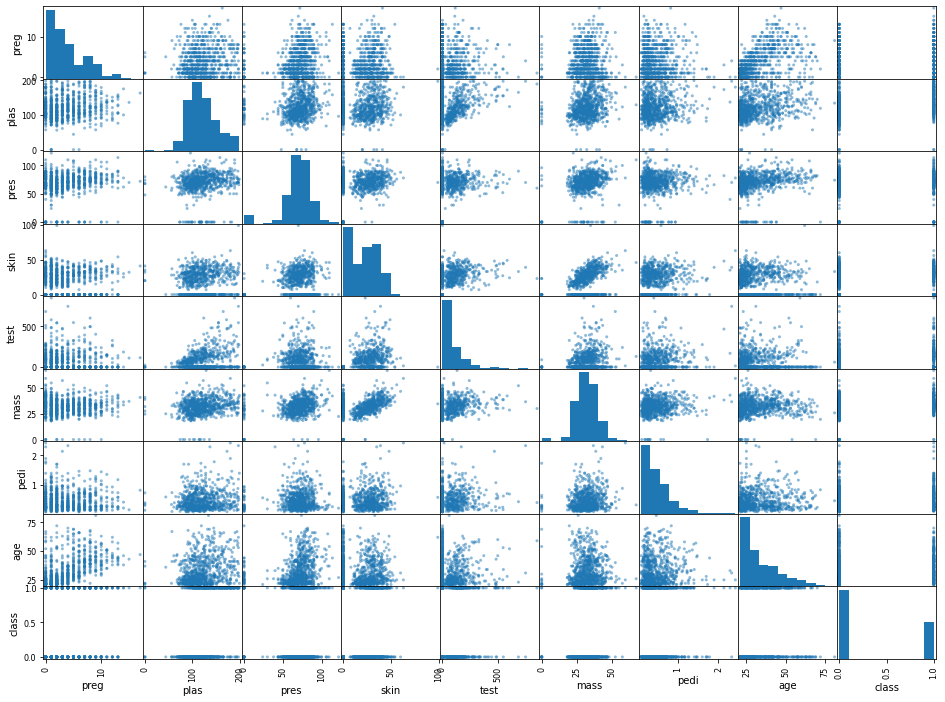

In [ ]:
scatter_matrix(data,figsize=(16,12))
plt.show()

## 3.3 Data Visualization - Seaborn to statistical charts

In [ ]:
import seaborn as sbn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.3.1 Pairplot

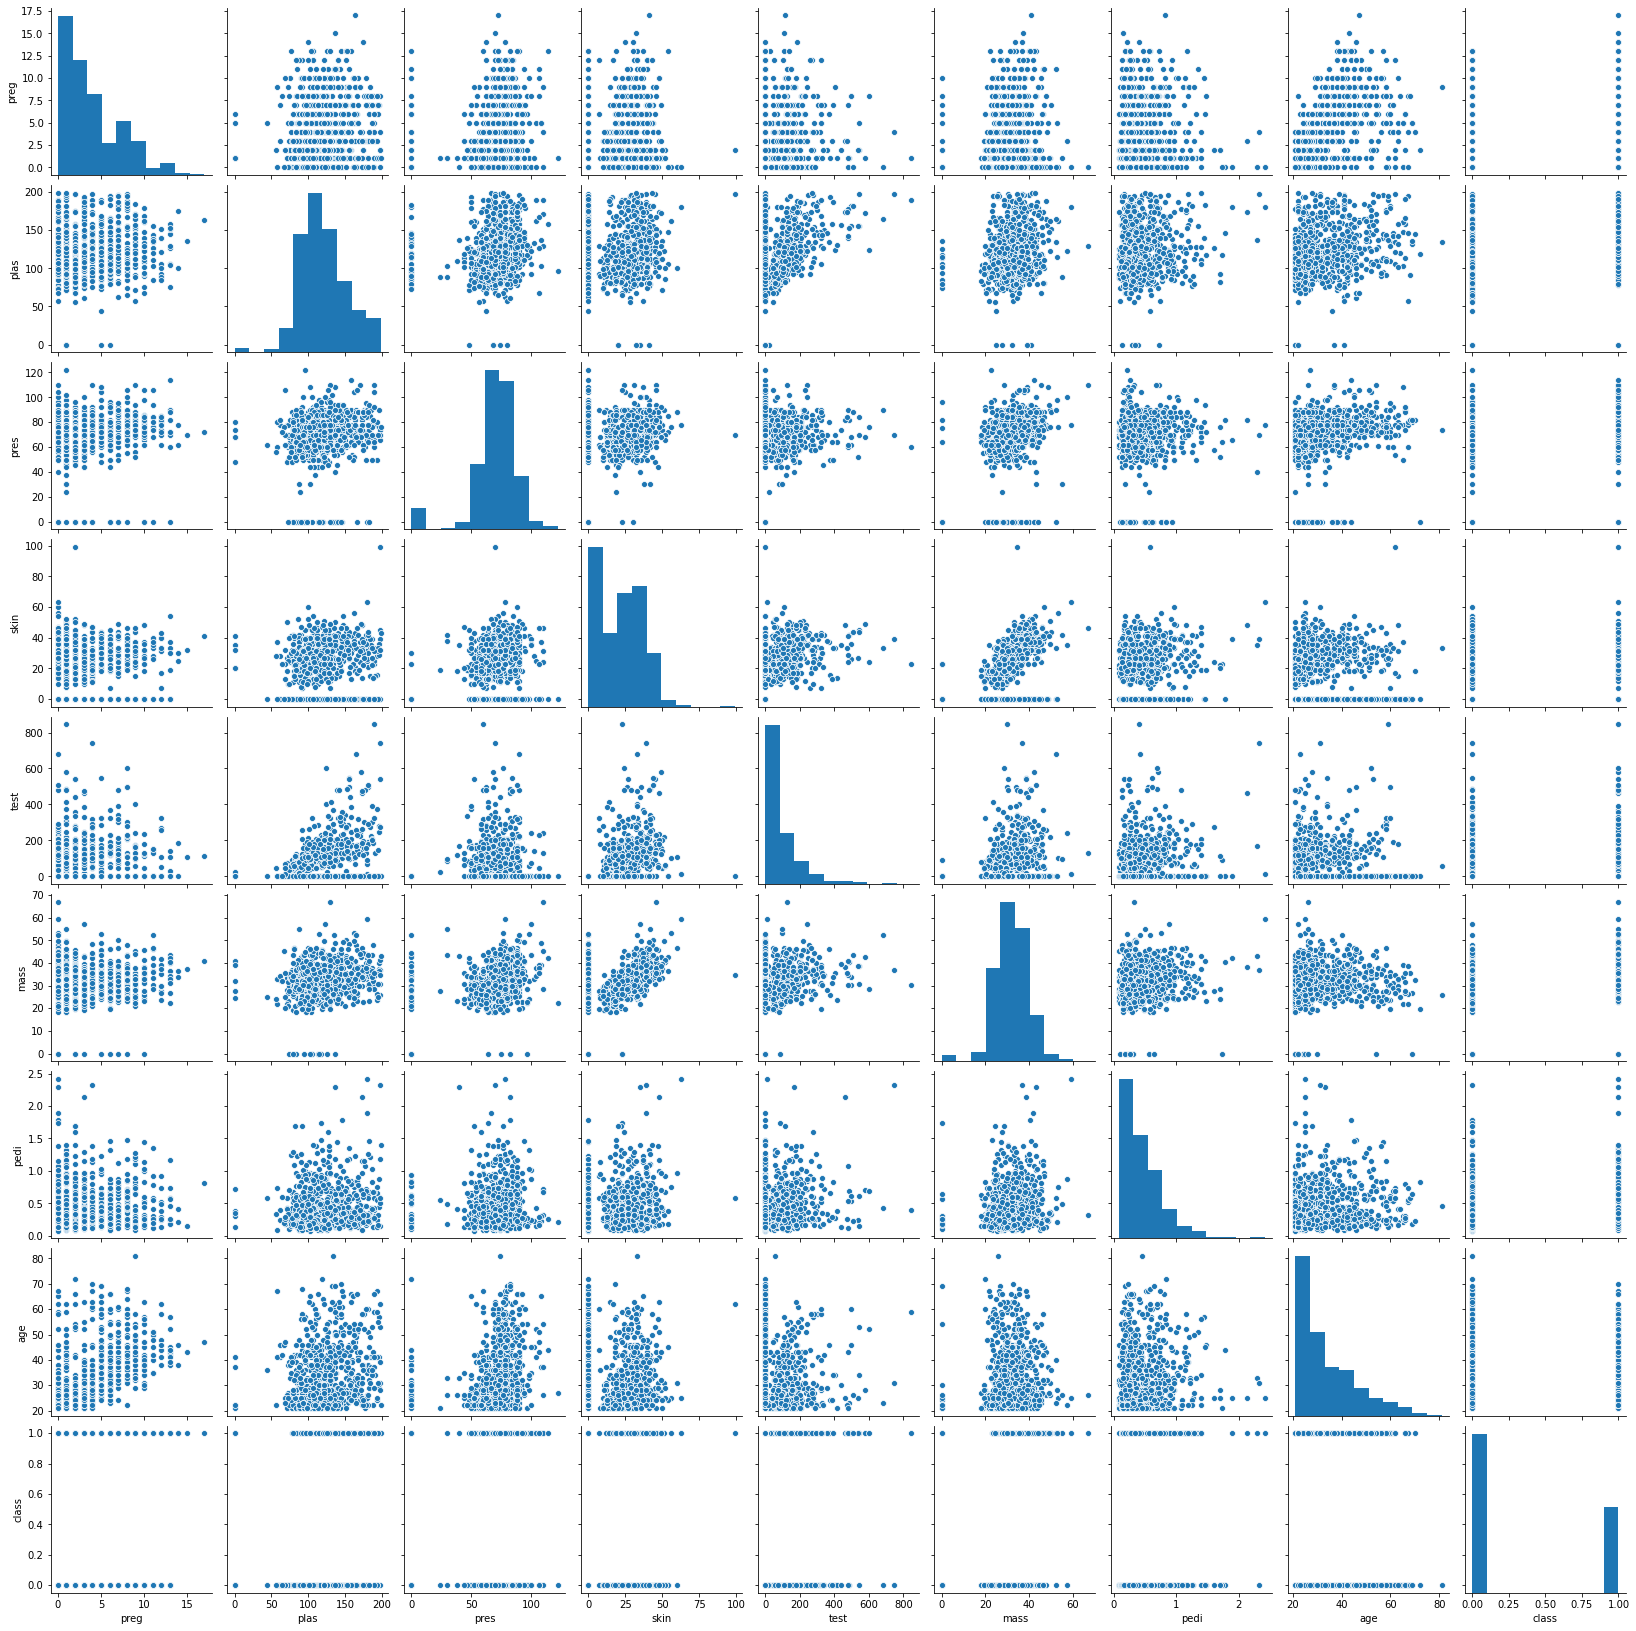

In [ ]:
sbn.pairplot(data)

### 3.3.2 Boxplot

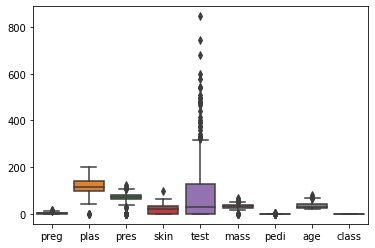

In [ ]:
sbn.boxplot(data=data,orient='v')

### 3.3.3 Cluster map

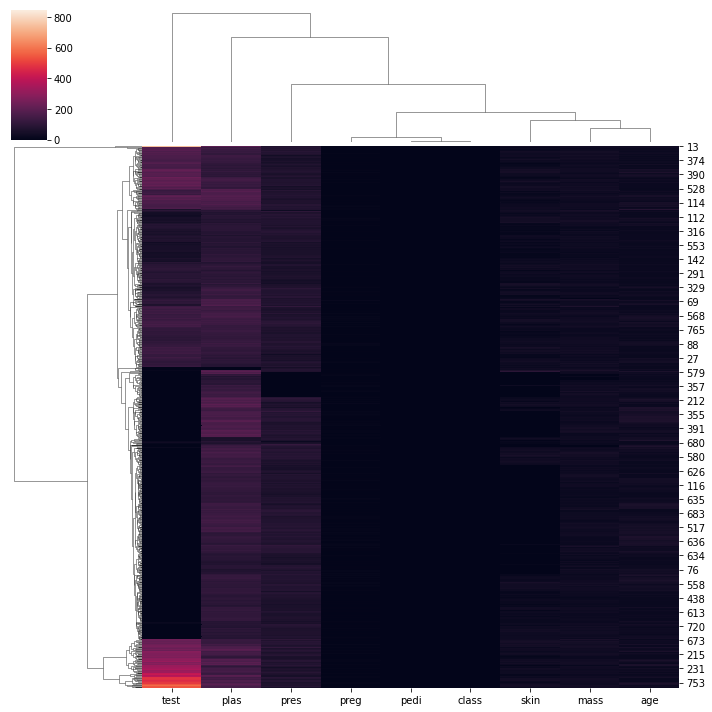

In [ ]:
sbn.clustermap(data)

### 3.3.4 Distplot

In [ ]:
from scipy import stats

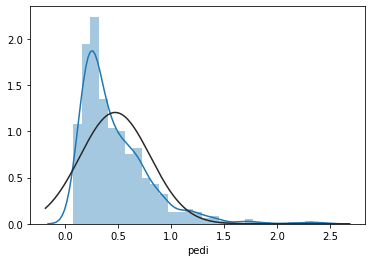

In [ ]:
sbn.distplot(data.pedi,fit=stats.norm)

## 3.4 Transformation of variables

### 3.4.1 Normalization

#### Method 1 - `MinMaxScaler`
source: [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

One of the first tasks the pre-processing process is to put the data on the same scale, many machine learning algorithms will benefit and produce better results. This step is also called normalization and mean that putting the data on the same scale in a range between `0` and `1`. It's useful to `optimization` being used on the core of machine learning algorithms, such as `gradient descent`.

It's useful too for algorithms, such as, `regression`, `neural networks` and algorithms that use distance measures, such as `KNN`. The [scikit-learn](https://scikit-learn.org/stable/index.html) has a library to this step called `.MinMaxScaler()`

In [ ]:
# Import libraries
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:8]

In [ ]:
# Putting the scale on a new scale
scaler = MinMaxScaler(feature_range=(0,1))

# Rescaling the input data (predictor variables), because the target variables
# are already on the scale between 0 and 1
rescaled_x = scaler.fit_transform(x)

In [ ]:
# Check the transformations
print('Original data:\n\n',x)
print('\n\nNormalized data:\n\n',rescaled_x)

Original data:

 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Normalized data:

 [[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


#### Method 2 - Normalizer
In scikit-learn, normalize refers to adjusting the scale for each observation (row) so that it has length of 1. Called `length of a vector` in `Linear Algebra`. This methos is useful when the data is sparse (with many zeros) and atributes with very variable scale.

In [ ]:
# Import libraries
from pandas import read_csv
from sklearn.preprocessing import Normalizer

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:8]

In [ ]:
# Normalizing data
scaler = Normalizer().fit(x)

# Normalizing the input data (predictor variables), because the target variables
# are already on the scale between 0 and 1
rescaled_x = scaler.transform(x)

In [ ]:
# Check the transformations
print('Original data:\n\n',x)
print('\n\nNormalized data:\n\n',rescaled_x)

Original data:

 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Normalized data:

 [[0.03355237 0.82762513 0.40262844 ... 0.18789327 0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 ... 0.22407851 0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 ... 0.11765825 0.00339341 0.16159073]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.00665306 0.83828547 0.39918356 ... 0.20025708 0.00232192 0.31269379]
 [0.00791454 0.73605211 0.55401772 ... 0.24060198 0.00249308 0.18203439]]


### 3.4.2 Standardization - StandardScaler
[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Standardization is the technique to transform the attributes with a `Gaussian Distribuition` (normal), different means and standard deviation into a `Gaussian Distribuition` with mean equal `0` and standard deviation equal `1`. 

It's useful for algorithms that expects the data with a `Gaussian Distribuition`, such as, `Linear Regression`, `Logistic Regression` and `Linear Discriminat Analysis`.

Works well with when the data is already in the same scale, the scikit-learn has a function to this step, called `StandardScaler()`.

In [ ]:
# Import libraries
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:8]

In [ ]:
# Standarlizing the data
scaler = StandardScaler().fit(x)

# Standarlizing the input data (predictor variables), because the target variables
# are already on the scale between 0 and 1
rescaled_x = scaler.transform(x)

In [ ]:
# Check the transformations
print('Original data:\n\n',x)
print('\n\nNormalized data:\n\n',rescaled_x)

Original data:

 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Normalized data:

 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### 3.4.3 Binarization - Turn the data into binary values
[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html)

We can define a value in our dataset, which we call `threshold` and then we define that all values more than the `threshold` will be marked as `1` and all values less than the `threshold` will be marked as `0`. 

It's useful when we have `probabilities` and we want transform the data in something more specific. The scikit-learn has a function called `Binarizer()`.


In [ ]:
# Import libraries
from pandas import read_csv
from sklearn.preprocessing import Binarizer

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:8]

In [ ]:
# Binarizing the data
binarizer = Binarizer(threshold=0.2).fit(x)

# Binarizing the input data (predictor variables), because the target variables
# are already on the scale between 0 and 1
binarized_x = binarizer.transform(x)

In [ ]:
# Check the transformations
print('Original data:\n\n',x)
print('\n\nNormalized data:\n\n',binarized_x[0:5,:])

Original data:

 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Normalized data:

 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## 3.5 Feature Selection
The attributes in a dataset and that are in used in training, will have a great influence on the accuracy and the outcome of the predictive model. Irrelevant attributes will have a negative impact on the performance, while [collinear attibutes](https://en.wikipedia.org/wiki/Collinearity) (two varables that represents the same information) could affect the degree of accuracy  of model.

This step is where we choose the best variables to be the predictor variables. The `Feature Selection` help us to reduce the `overfitting`, when the algorithm learns too much, increase the accuracy and reduce the time of training.

### 3.5.1 Univariate Selection
[sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

Statistical tests can be used to select attributes that have a strong relationship with the variable that we're trying to predict.The scikit-learn has a function `SelectKBest()` that can be used with many statistica tests to select the attibutes. 

Let's use the `q-squared` and select the 4 best attributes that can be used as predictor variables.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Function to select the best variable, returning the 4 best attributes
best_var = SelectKBest(score_func=chi2,k=4)

In [ ]:
# Execute the score function on (x,y) and get the selected attributes
fit = best_var.fit(x,y)

In [ ]:
# Reduce x to the selected feature
features = fit.transform(x)

In [ ]:
# Outcome
print('Original quatity of features:\n\n',x.shape[1])
print('\n\nReduced quantity of features:\n\n',features.shape[1])

# 4 columns with the best of the predictor variables most relevants
print('\n\nFeatures (selected variables):\n\n',features)

Original quatity of features:

 8


Reduced quantity of features:

 4


Features (selected variables):

 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


### 3.5.2 Recursive Feature Elimination (RFE)
[sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

Recursively remove the attibutes and build the model with the remaing attibutes. This technique uses the accuracy of the model to identify the attibutes that more contribuite to predict target variable.

This example, uses the RFE technique with the `Logistic Regression` to selects the 3 best predict variables. The RFE selects `preg`, `mass` and `pedi` that are marked with `True` in `Selected Attributes` and value `1` at `Ranking Attributes`.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Create the logistic regression model
model = LogisticRegression()

In [ ]:
# RFE
rfe = RFE(model,3)
fit = rfe.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Print outcomes
print("Predictor variables:", data.columns[0:8])
print("Selected variables: %s" % fit.support_)
print("Score attributes: %s" % fit.ranking_)
print("Number of the best attributes: %d" % fit.n_features_)

Predictor variables: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Selected variables: [ True False False False False  True  True False]
Score attributes: [1 2 4 5 6 1 1 3]
Number of the best attributes: 3


### 3.5.3 Ensemble - To variable select
[sklearn.ensemble.ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

Bagged Decision Trees, such as Randon Forest algorithm, can be used to estimate the importance of each attribute. This method returns a score to each attribute.

How bigger is the score, the greater the importance of attribute.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Create model
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Print outcomes
print(data.columns[0:8])
print(model.feature_importances_)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.11256338 0.22737258 0.10043938 0.07965753 0.07629476 0.14152677
 0.12073916 0.14140644]


## 3.6 Feature Extraction - Dimensionality Reduction


### 3.6.1 Principal Component Analysis (PCA)

O PCA foi inventado em 1901 por Karl Pearson e utiliza álgebra linear para transformar datasets em uma forma comprimida, o que é geralmente conhecido como Redução de Dimensionalidade. Com PCA você pode escolher o número de dimensões (chamados componentes principais) no resultado transformado. Vamos usar PCA para selecionar 3 componentes principais.


A Análise de Componentes Principais (PCA) é um método para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis, disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequenos de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa. PCA é mais útil quando se lida com 3 ou mais dimensões.

![alt text](http://www.nlpca.org/fig_pca_principal_component_analysis.png)

Cada componente resultante é uma combinação linear de n atributos. Ou seja, cada componente principal é uma combinação de atributos presentes no dataset. O Primeiro Componente Principal é a combinação linear dos atributos com máxima variância e determina a direção em que há mais alta variabilidade nos dados. Quanto maior a variabilidade capturada no primeiro componente principal, mais informação será capturada pelo componente. O Segundo Componente Principal captura a variabilidade remanescente. Todos os componentes subsequentes possuem o mesmo conceito.

O PCA precisa ser alimentado com dados normalizados. Utilizar o PCA em dados não normalizados pode gerar resultados inesperados.

Procura-se redistribuir a variação observada nos eixos originais de forma a se obter um conjunto de eixos ortogonais não correlacionados. Esta técnica pode ser utilizada para geração de índices e agrupamento de indivíduos. A análise agrupa os indivíduos de acordo com sua variação, isto é, os indivíduos são agrupados segundo suas variâncias, ou seja, segundo seu comportamento dentro da população, representado pela variação do conjunto de características que define o indivíduo, ou seja, a técnica agrupa os indivíduos de uma população segundo a variação de suas características.

O objetivo é sumarizar os dados que contém muitas variáveis (p) por um conjunto menor de variáveis (k) compostas derivadas a partir do conjunto original. PCA usa uma conjunto de dados representado por uma matriz de n registros por p atributos, que podem estar correlacionados, e sumariza esse conjunto por eixos não correlacionados (componentes principais) que são uma combinação linear das p variáveis originais. As primeiras k componentes contém a maior quantidade de variação dos dados.

Em termos gerais a PCA busca reduzir o número de dimensões de um dataset, projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."
No dataset reduzido podemos observar com mais clareza tendências, padrões e/ou outliers. Mas vale lembrar que a regra: "Se não está nos dados brutos não existe!" é sempre válida. A PCA fornece apenas mais clareza aos padrões que já estão lá.

* Um componente não é uma nova variável e sim um agrupamento de variáveis que tem variância similar onde tem o mesmo impacto ao algoritimo de machine learning;
* O resultado está ordenado por grau de variância do maior para o menor;
* Depois para treinar o algoritimo, não são apresentados as variáveis do dataset, são aprensentados os componentes. Primeiro é aplicado o PCA e então são entregues ao algoritimo.




In [ ]:
# Import modules
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Normalizing data
scaler = MinMaxScaler(feature_range = (0, 1))
rescaled_x = scaler.fit_transform(x)

In [ ]:
# Select attributes, a component is a group that has a similar variance
pca = PCA(n_components = 4)
fit = pca.fit(rescaled_x)

In [ ]:
# Print outcomes
print("Variance: %s" % fit.explained_variance_ratio_)
print('\n\n',fit.components_)

Variance: [0.31192249 0.21186663 0.11819693 0.10349153]


 [[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


## 3.5 Train and Test data
Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

### 3.5.1 Resampling
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [ ]:
# Import libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split

# We'll use the Logistic Regression in this example
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Define the sample size
test_size = 0.33

In [ ]:
# Make the train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)

In [ ]:
# make model
model = LogisticRegression()

# Model training, with train data
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Run model on test dataset
result = model.score(x_test, y_test)

In [ ]:
# Check accuracy of model
print("Accuracy on the test dataset: %.3f%%" % (result * 100.0))

Accuracy on the test dataset: 75.591%


### 3.5.2 Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

![alt text](https://i.stack.imgur.com/FKKvG.png)

In [ ]:
# Importing libraries
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load data

# Path
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

# Add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']

# Read data
data = read_csv(file,names=columns)

# Extract values to make the normalizatio
array = data.values

In [ ]:
# Split the values in input(x) and output(y)
x = array[:,0:8]
y = array[:,8]

In [ ]:
# Define fold value
num_folds = 20

In [ ]:
# Split data in folds
kfold = KFold(num_folds, True)

In [ ]:
# Make the model
model = LogisticRegression()
result = cross_val_score(model, x, y, cv = kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Check results using mean and standard deviation
print("Accuract: %.3f%%" % (result.mean() * 100.0))

Accuract: 76.832%


# 4. Model Evaluation
[Metrics and scoring: quantifying the quality of predictions
](https://scikit-learn.org/stable/modules/model_evaluation.html)

## 4.1 Accuracy

In [ ]:
# Number of correct predictions. 
# It's useful when there there is the same observation number in each class.

# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = LogisticRegression()

# Cross Validation - Using scoring parameter as accuracy
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 77.722


## 4.2 ROC curve
ROC curve allows to analyse the measure AUC (Area Under the Curve).

This is a performance metric of binary classification, where we can define positive and negative classes.

Binary classification problems are a trade-off between Sensitivity and Specifity.

Sensitivity is the rate of true positives (TP), this is the number of positive instances of the fitst class that was predict correctly.

Specifity is the rate of true negatives (TN), this is the number of second class that was predicted correctly.

Values more than 0.5 imply a good predict rate.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = LogisticRegression()

# Cross Validation - Using scoring parameter as roc auc
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 82.952


## 4.3 Confusion Matrix


In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Define the dataset size
test_size = 0.33

# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

# Create the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Making the predictions and making the confusion matrix
predicts = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicts)

# Printing Confusion Matrix
print(matrix)

[[147  21]
 [ 39  47]]


## 4.4 Classification Report

In [ ]:
# Import Modules
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Define the dataset size
test_size = 0.33

# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

# Making the predictions and report
predicts = model.predict(X_test)
report = classification_report(Y_test, predicts)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       163
         1.0       0.65      0.49      0.56        91

    accuracy                           0.72       254
   macro avg       0.70      0.67      0.68       254
weighted avg       0.72      0.72      0.71       254



# 5. Testing and Evaluating the Algorithms to be use
We don't know which algoritm will work better, before testing it in the dataset. The best way is to test some algorithms and then choose the precise algorithm. 

We'll test a set of classification algorithms on the same conditions.

## 5.1 Logistic Regression
This linear algorithm assumes that the data is in Normal Distribuition to numeric values that can be modeled with binary classification.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = LogisticRegression()

# Cross Validation - Using scoring parameter as accuracy
result = cross_val_score(model, X, Y, cv = kfold)

# Cross Validation - Using normalized data from 3.4.1 - method 2
result2 = cross_val_score(model, rescaled_x, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

# Print results
print("normalized data accuracy: %.3f" % (result2.mean() * 100))

Accuracy: 77.741
normalized data accuracy: 64.850


## 5.2 Linear Discriminant Analysis
A statistic technique of binary classification, also assumes that the data are in a Normal Distribuition.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = LinearDiscriminantAnalysis()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold)

# Cross Validation - Using normalized data from 3.4.1 - method 2
result2 = cross_val_score(model, rescaled_x, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

# Print results
print("normalized data accuracy: %.3f" % (result2.mean() * 100))

Accuracy: 77.090
normalized data accuracy: 66.167


## 5.3 KNN - K-Nearest Neighbors
This non-linear regression uses a `Euclidean distance` to find the K value with best distance in the train dataset.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = KNeighborsClassifier()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))


Accuracy: 71.871


## 5.4 Naive Bayes
This non-linear algorithm, calcules the conditional probability of each class given an input variable. The probabilities are estimate to the new data multiplied, assuming that it's independent (simple supposition or naive ). Assumes data in normal distribuition (Gaussian).

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = GaussianNB()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 75.272


## 5.5 CART (Classification and Regression Trees)
This non-linear algorithm, builds a binary tree from the train data. Each attribute and each value of each attibute are evaluated with the objective to reduce the `cost function`.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = DecisionTreeClassifier()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 69.281


## 5.6 SVM - Support Vector Machines
This algorithm searches a line that best split two classes inside of a dataset. The data intances that are closer of that line are called of `support vectors`. The SVM has been extended to support multiclassing and they are stronger algorithms.

This algorithms are a bit harder to visualize because your formulation complexity.

In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the arrau on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the quantity of folds
num_folds = 10

# Split the data in folds
kfold = KFold(num_folds, True)

# Making the model
model = SVC()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print results
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 76.044


# 6. Automating the evaluation of algorithms

LR: 0.773428 (0.053375)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.696548 (0.061268)
SVM: 0.760424 (0.052931)


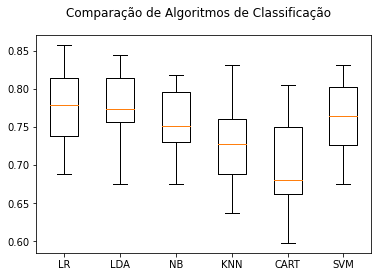

In [ ]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# 7. Model Optimization - Adjusting the hyperparameters
The scikit-learn offers two methods to automatic optimization: Grid Search Parameter Tuning and Ramdom Search Parameter Tuning.

## 7.1 Grid Search Parameter Tuning
This algorithm realize methodically a combination among all parameters, making a grid. We'll use this method using the Logistic Regression.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Grid values
# Check parameters of Logistic Regression on their document: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Making the model
model = LogisticRegression()

# Making the grid
grid = GridSearchCV(estimator=model,param_grid=grid_values)
grid.fit(X,Y)

# Print results
print("Accuracy: %.3f" % (grid.best_score_ * 100))
print("Best parameters:\n", grid.best_estimator_)

Accuracy: 77.610
Best parameters:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## 7.2 Random Search Parameter Tuning
This method generates samples from a uniform randomic distribuition to a fixed number of iterations. 

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Defining the iterations
iterations = 14

# Defining the values to be test
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Making the model
model = LogisticRegression()

# Making the grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations)
rsearch.fit(X,Y)

# Print results
print("Accuracy: %.3f" % (rsearch.best_score_ * 100))
print("Best parameters:\n", rsearch.best_estimator_)

Accuracy: 77.610
Best parameters:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 8. Saving the work on the disk with `pickle`



In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Size of train data
test_size = 0.33

# Making de train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

# Making the model
model = LogisticRegression()

# Training the model
model.fit(X_train, Y_train)

# Saving the model
file = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/modelo_classificador_final.sav'
pickle.dump(model, open(file, 'wb'))
print("Model saved!")

# Loading the file
final_model = pickle.load(open(file, 'rb'))
model_prod = final_model.score(X_test, Y_test)
print("Model loaded!")

# Print results
print("Accuracy: %.3f" % (model_prod.mean() * 100))

Model saved!
Model loaded!
Accuracy: 79.134


# 8. Performance Optimizing with Ensemble Methods
Ensemble methods allows to leverage considerably the precision level of our predictions, we'll see how to create some `Ensemble Methods` most powerfull in Python.

There are three main methods to combine predictions from different methods:

*   Bagging: To make multiples models (normally with same type) from different subsets of train dataset;
*   Boosting: To make multiples models (normally with same type), where each model learn how to correct the errors by the previous model. In general this method can take de best results;
*   Voting: To make multiples models (normally with different types), and simples statistics (such as mean) are used to combine the predictions.






## 8.1 Bagged Decision Trees
This method works well when there is a high variance in the data.

In [ ]:
# import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Number of Folds
num_folds = 10

# Split data in folds
kfold = KFold(num_folds, True)

# Make a unitary model (weak model)
cart = DecisionTreeClassifier()

# number of trees
num_trees = 100

# Make the bagging model
model = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)

# Cross validation
outcome = cross_val_score(model, X, Y, cv = kfold)

# Print outcome
print("Accuracy: %.3f" % (outcome.mean() * 100))

Accuracy: 77.486


## 8.2 Random Forest
This is an extension from Bagging Decision Tree. Samples from the train dataset is used with replace, but the trees are created in a way that reduce the correlation between individual classifiers. Random Forest is a set of decision trees.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Number of Folds
num_folds = 10

# number of trees and number of features
num_trees = 100
max_features = 3

# Split data in folds
kfold = KFold(num_folds, True)

# Make model
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print outcome
print("Accuracy: %.3f" % (outcome.mean() * 100))

Accuracy: 77.486


## 8.3 AdaBoost
Algorithms based on Boosting Ensemble make a model sequence that try to correct the erros from previous models inside a sequence. Once created, the models make predictions that can receive a weight according of your accuracy and the results are combined to make an unique final prediction.

The AdaBoost assign weights to the instances in dataset, definind how easier or harder they are to classification processes, allowing the algorithm has more or less attention to intances during the model building process.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Number of Folds
num_folds = 10

# number of trees
num_trees = 100

# Split data in folds
kfold = KFold(num_folds, True)

# Make model
model = AdaBoostClassifier(n_estimators = num_trees)

# Cross validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print outcome
print("Accuracy: %.3f" % (outcome.mean() * 100))

Accuracy: 77.486


## 8.4 Gradient Boosting
Also called as Stochastic Gradient Boosting, is a most sophisticated algorithms.

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Number of Folds
num_folds = 10

# number of trees
num_trees = 100

# Split data in folds
kfold = KFold(num_folds, True)

# Make model
model = GradientBoostingClassifier(n_estimators = num_trees)

# Cross validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print outcome
print("Accuracy: %.3f" % (outcome.mean() * 100))

Accuracy: 77.486


## 8.5 Voting Ensemble
This is an most simple ensemble algorithm. This method makes two or more separated models from train dataset. The Voting classifier utilizes a prediction mean from each sub-model to make the predictions on new datasets. The predictions of each sub-model can receive weights, through paramenter defining manually or heuristic. There are advanced versions of Voting, where the model can learn the best weight to be assign to submodels. It's called as Stacked Aggregation, but isn't available in Scikit-learn. 

In [ ]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Number of Folds
num_folds = 10

# number of trees
num_trees = 100

# Split data in folds
kfold = KFold(num_folds, True)

# Criando os modelos
estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

# make the ensemble model
ensemble = VotingClassifier(estimators)

# Cross validation
result = cross_val_score(model, X, Y, cv = kfold)

# Print outcome
print("Accuracy: %.3f" % (outcome.mean() * 100))

Accuracy: 77.486


## 8.6 Algoritmo XGBoost - Extreme Gradient Boosting
This algorithm is an extension from GBM (Gradient Boosting Method) that allows working with multitheading in a unique machine and parallel processing on a cluster with many servers. The main advantage of XGBoost over the GBM is their managing capacity to handle sparse data. 

The XGBoost automatically receives sparse data as input without store zeros in memory.

Main advantage:
* Accept sparse data (that allow working with sparse matrices), without conversion necessity to dense matrices;
* Build a learning tree using a mordern method of spliting (called quatile sketch), that results in less time processing than tranditional methods;
* Allows parallel computing on a unique machine (thought of multithreading) and distribuited parallel processing on clusters;

Basically the XGBoost the same parameters that GBM and allow advanced treatment of missing data.

The XGBoost is used by data scientists from Kaggle competitions.

Github repository: https://github.com/dmlc/XGBoost


In [1]:
# Install XGBoost
!pip install xgboost

In [8]:
# Import modules
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load data
data = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(data, names = cols)
array = data.values

# Divide the array on input and output components
X = array[:,0:8]
Y = array[:,8]

# Test size
test_size = 0.33

# Train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size)

# Making model
model = XGBClassifier()

# Training model
model.fit(X_train, y_train)
print(model)

# Making predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Results
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 75.98%
